In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sna
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
train_data=pd.read_csv("/content/fraudTrain.csv")
test_data=pd.read_csv("/content/fraudTest.csv")

-----drop rows with null values-----

In [6]:
train_cleaned = train_data.dropna()
test_cleaned = test_data.dropna()

In [7]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [8]:
pd.options.display.max_columns=None

In [9]:
train_cleaned.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654.0,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160.0,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252.0,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632.0,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433.0,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [10]:
train_cleaned.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
31145,31145,2019-01-19 16:30:45,2235613922823698,fraud_O'Hara-Wilderman,food_dining,16.59,Melissa,Mcclure,F,2027 Snyder Track,Manville,WY,82227.0,42.7300,-104.7024,241.0,Educational psychologist,1980-12-16,446ac7f2d94308e863fa868bc5747bdc,1.326991e+09,42.881643,-104.090314,0.0
31146,31146,2019-01-19 16:32:18,373905417449658,"fraud_Lesch, D'Amore and Brown",food_dining,166.48,Sarah,Bishop,F,554 Mcdonald Valley Apt. 539,Meridian,TX,76665.0,31.9290,-97.6443,2526.0,Phytotherapist,1970-11-12,b11956373cff82dc89c95b436cbf5ac6,1.326991e+09,32.616988,-97.509247,0.0
31147,31147,2019-01-19 16:33:30,4979422371139333,"fraud_Torp, Muller and Borer",health_fitness,1.15,Kelly,Zimmerman,F,1893 Katie Tunnel,Westerville,NE,68881.0,41.4193,-99.3844,73.0,Product designer,1935-02-10,3cbb9b00056db701b0cc69ba7c0ebbce,1.326991e+09,40.534852,-98.720506,0.0
31148,31148,2019-01-19 16:33:50,349612764943496,fraud_Jacobi Inc,health_fitness,72.92,Xavier,Beltran,M,61107 Edwards Dam Apt. 463,Big Creek,KY,40914.0,37.1046,-83.5706,467.0,"Psychologist, forensic",1984-06-04,18a4b54a9d377751eb069e92682c4c54,1.326991e+09,37.505811,-82.874039,0.0
31149,31149,2019-01-19 16:34:54,213156747557083,fraud_Reichel LLC,personal_care,3.04,Adam,Santos,M,725 Jo Trace Apt. 102,Glendale,CA,91206.0,34.1556,-118.2322,172817.0,Advertising account planner,1982-07-30,1a5390332bc3fb6af45c563e41a2a968,1.326991e+09,34.399891,-118.092352,0.0


In [11]:
test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35007 entries, 0 to 35006
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             35007 non-null  int64  
 1   trans_date_trans_time  35007 non-null  object 
 2   cc_num                 35007 non-null  int64  
 3   merchant               35007 non-null  object 
 4   category               35007 non-null  object 
 5   amt                    35007 non-null  float64
 6   first                  35007 non-null  object 
 7   last                   35007 non-null  object 
 8   gender                 35007 non-null  object 
 9   street                 35007 non-null  object 
 10  city                   35007 non-null  object 
 11  state                  35007 non-null  object 
 12  zip                    35007 non-null  int64  
 13  lat                    35007 non-null  float64
 14  long                   35007 non-null  float64
 15  city_po

In [12]:
test_cleaned.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

------drop unwanted columns-------


In [13]:
drop_columns=['trans_date_trans_time','merchant','category','first','last','gender','street','city','state','zip','city_pop','job','dob','unix_time']
train_cleaned=train_cleaned.drop(drop_columns,axis=1)
test_cleaned=test_cleaned.drop(drop_columns,axis=1)

In [14]:
train_cleaned.shape
test_cleaned.shape

(35007, 9)

In [15]:
train_cleaned.head()
test_cleaned.head()

,Unnamed: 0,cc_num,amt,lat,long,trans_num,merch_lat,merch_long,is_fraud
0,0,2291163933867244,2.86,33.9659,-80.9355,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,0.0
1,1,3573030041201292,29.84,40.3207,-110.4360,324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,0.0
2,2,3598215285024754,41.28,40.6729,-73.5365,c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,0.0
3,3,3591919803438423,60.05,28.5697,-80.8191,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,0.0
4,4,3526826139003047,3.19,44.2529,-85.0170,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,0.0


-----normalise_the _numerical_data_between_0,1-------

In [16]:
import sklearn as sk

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc=StandardScaler()
train_cleaned['amt']=sc.fit_transform(pd.DataFrame(train_cleaned['amt']))
test_cleaned['amt']=sc.fit_transform(pd.DataFrame(test_cleaned['amt']))
train_cleaned['lat']=sc.fit_transform(pd.DataFrame(train_cleaned['lat']))
test_cleaned['lat']=sc.fit_transform(pd.DataFrame(test_cleaned['lat']))
train_cleaned['long']=sc.fit_transform(pd.DataFrame(train_cleaned['long']))
test_cleaned['long']=sc.fit_transform(pd.DataFrame(test_cleaned['long']))
train_cleaned['merch_lat']=sc.fit_transform(pd.DataFrame(train_cleaned['merch_lat']))
test_cleaned['merch_lat']=sc.fit_transform(pd.DataFrame(test_cleaned['merch_lat']))
train_cleaned['merch_long']=sc.fit_transform(pd.DataFrame(train_cleaned['merch_long']))
test_cleaned['merch_long']=sc.fit_transform(pd.DataFrame(test_cleaned['merch_long']))


------check_if_the_dataset_consists_of_any_duplicates-----

In [19]:
train_cleaned.duplicated().any()

False

In [20]:
test_cleaned.duplicated().any()

False

In [21]:
train_cleaned['is_fraud'].value_counts()

is_fraud
0.0    30841
1.0      309
Name: count, dtype: int64

In [22]:
test_cleaned['is_fraud'].value_counts()

is_fraud
0.0    34864
1.0      143
Name: count, dtype: int64

------data is more for 0 class and very less for 1 class------

<function matplotlib.pyplot.show(close=None, block=None)>

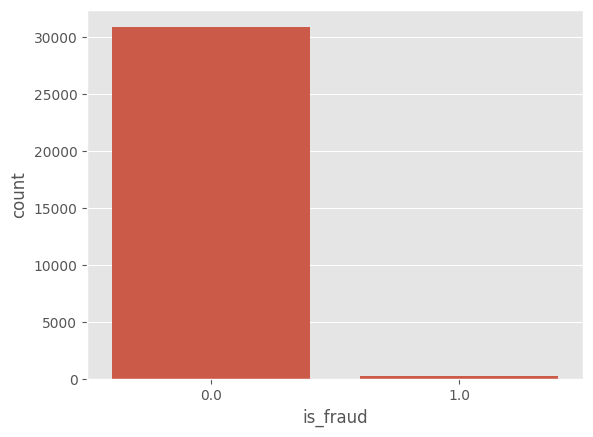

In [23]:
plt.style.use('ggplot')
sna.countplot(x='is_fraud',data=train_cleaned)
plt.show

In [24]:
legitimate=train_cleaned[train_cleaned.is_fraud==0]
fraudulent=train_cleaned[train_cleaned.is_fraud==1]

In [25]:
legitimate.shape

(30841, 9)

In [26]:
fraudulent.shape

(309, 9)

------undersampling-------

make the number of rows equal to the smallest value in both 0 and 1


In [27]:
legitimate_sample=legitimate.sample(n=45)

In [28]:
legitimate_sample.shape

(45, 9)

add the sample data to the new dataset

In [29]:
new_train_data=pd.concat([legitimate_sample,fraudulent],axis=0,ignore_index=True)

In [30]:
legitimate_test=test_cleaned[test_cleaned.is_fraud==0]
fraudulent_test=test_cleaned[test_cleaned.is_fraud==1]

same for test data.......

In [31]:
legitimate_test.shape

(34864, 9)

In [32]:
fraudulent_test.shape

(143, 9)

In [33]:
legitimate_test_sample=legitimate_test.sample(n=29)

In [34]:
legitimate_test_sample.shape

(29, 9)

In [35]:
new_test_data=pd.concat([legitimate_test_sample,fraudulent_test],axis=0,ignore_index=True)

In [36]:
new_train_data['is_fraud'].value_counts()

is_fraud
1.0    309
0.0     45
Name: count, dtype: int64

In [37]:
new_test_data['is_fraud'].value_counts()

is_fraud
1.0    143
0.0     29
Name: count, dtype: int64

In [38]:
new_train_data.head()

,Unnamed: 0,cc_num,amt,lat,long,trans_num,merch_lat,merch_long,is_fraud
0,25915,30197398657930,-0.358347,-0.475551,0.833145,15e8f472ecf79dc1fcf317ef6f123019,-0.458087,0.805244,0.0
1,1543,30030380240193,-0.136622,-1.619558,-0.646232,7249b5199960cc7f1434487fd131a374,-1.603585,-0.585034,0.0
2,17851,4689147265057948423,-0.226795,0.467840,-0.425475,376ba8f062683b2d0b7d47a320f79a18,0.341563,-0.452852,0.0
3,11444,4586810168620942,-0.072598,-1.174771,0.713938,5a8328e8fc4feb672a717cf66ebf8c66,-1.336891,0.694196,0.0
4,2423,4958589671582726883,0.247994,0.049677,0.931261,f6d44e5ce3880a8b7a3237ede62f1d8f,-0.021097,0.873241,0.0


In [39]:
new_train_data=new_train_data.drop(columns=['trans_num'])

In [40]:
new_test_data=new_test_data.drop(columns=['trans_num'])

In [41]:
X_train=new_train_data.drop('is_fraud',axis=1)
y_train=new_train_data['is_fraud']
X_test=new_test_data.drop('is_fraud',axis=1)
y_test=new_test_data['is_fraud']

In [42]:
classifier={
    'LogisticRegression':LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier':DecisionTreeClassifier(random_state=42),
}
for name,clf in classifier.items():
  print(name)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(f"\n ACCURACY SCORE = {accuracy_score(y_test,y_pred)}")
  print(f"\n CONFUSION MATRIX =\n {confusion_matrix(y_test,y_pred)}")
  print(f"\n CLASSIFICATION REPORT =\n {classification_report(y_test,y_pred)}")

LogisticRegression

 ACCURACY SCORE = 0.8313953488372093

 CONFUSION MATRIX =
 [[  0  29]
 [  0 143]]

 CLASSIFICATION REPORT =
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.83      1.00      0.91       143

    accuracy                           0.83       172
   macro avg       0.42      0.50      0.45       172
weighted avg       0.69      0.83      0.75       172

DecisionTreeClassifier

 ACCURACY SCORE = 0.8662790697674418

 CONFUSION MATRIX =
 [[ 20   9]
 [ 14 129]]

 CLASSIFICATION REPORT =
               precision    recall  f1-score   support

         0.0       0.59      0.69      0.63        29
         1.0       0.93      0.90      0.92       143

    accuracy                           0.87       172
   macro avg       0.76      0.80      0.78       172
weighted avg       0.88      0.87      0.87       172



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--------oversampling-------

In [43]:
X_train.shape

(354, 7)

In [44]:
X_test.shape

(172, 7)

In [45]:
y_train.shape

(354,)

In [46]:
y_test.shape

(172,)

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
X_train_res, y_train_res=SMOTE().fit_resample(X_train,y_train)

In [49]:
y_train_res.value_counts()

is_fraud
0.0    309
1.0    309
Name: count, dtype: int64

In [63]:
classifier={
    'LogisticRegression':LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
}
for name,clf in classifier.items():
  print(name)
  clf.fit(X_train_res,y_train_res)
  y_pred=clf.predict(X_test)
  print(f"\n ACCURACY SCORE = {accuracy_score(y_test,y_pred)}")
  print(f"\n CONFUSION MATRIX =\n {confusion_matrix(y_test,y_pred)}")
  print(f"\n CLASSIFICATION REPORT =\n {classification_report(y_test,y_pred)}")

LogisticRegression

 ACCURACY SCORE = 0.995915102693747

 CONFUSION MATRIX =
 [[34864     0]
 [  143     0]]

 CLASSIFICATION REPORT =
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34864
         1.0       0.00      0.00      0.00       143

    accuracy                           1.00     35007
   macro avg       0.50      0.50      0.50     35007
weighted avg       0.99      1.00      0.99     35007

DecisionTreeClassifier

 ACCURACY SCORE = 0.6343302768017826


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte


 CONFUSION MATRIX =
 [[22080 12784]
 [   17   126]]

 CLASSIFICATION REPORT =
               precision    recall  f1-score   support

         0.0       1.00      0.63      0.78     34864
         1.0       0.01      0.88      0.02       143

    accuracy                           0.63     35007
   macro avg       0.50      0.76      0.40     35007
weighted avg       1.00      0.63      0.77     35007

RandomForestClassifier

 ACCURACY SCORE = 0.7600479904019196

 CONFUSION MATRIX =
 [[26488  8376]
 [   24   119]]

 CLASSIFICATION REPORT =
               precision    recall  f1-score   support

         0.0       1.00      0.76      0.86     34864
         1.0       0.01      0.83      0.03       143

    accuracy                           0.76     35007
   macro avg       0.51      0.80      0.45     35007
weighted avg       1.00      0.76      0.86     35007



--------without_sampling--------

In [51]:
train_cleaned=train_cleaned.drop(columns=['trans_num'])
test_cleaned=test_cleaned.drop(columns=['trans_num'])

In [52]:
X_train=train_cleaned.drop('is_fraud',axis=1)
y_train=train_cleaned['is_fraud']
X_test=test_cleaned.drop('is_fraud',axis=1)
y_test=test_cleaned['is_fraud']

In [53]:
classifier={
    'LogisticRegression':LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
}
for name,clf in classifier.items():
  print(name)
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(f"\n ACCURACY SCORE = {accuracy_score(y_test,y_pred)}")
  print(f"\n CONFUSION MATRIX =\n {confusion_matrix(y_test,y_pred)}")
  print(f"\n CLASSIFICATION REPORT =\n {classification_report(y_test,y_pred,zero_division='warn')}")

LogisticRegression

 ACCURACY SCORE = 0.995915102693747

 CONFUSION MATRIX =
 [[34864     0]
 [  143     0]]

 CLASSIFICATION REPORT =
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     34864
         1.0       0.00      0.00      0.00       143

    accuracy                           1.00     35007
   macro avg       0.50      0.50      0.50     35007
weighted avg       0.99      1.00      0.99     35007

DecisionTreeClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte


 ACCURACY SCORE = 0.9911446282172137

 CONFUSION MATRIX =
 [[34650   214]
 [   96    47]]

 CLASSIFICATION REPORT =
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     34864
         1.0       0.18      0.33      0.23       143

    accuracy                           0.99     35007
   macro avg       0.59      0.66      0.61     35007
weighted avg       0.99      0.99      0.99     35007



let us predict the class for a new data using logistic regression as logistic regression has more performance than decision tree.

In [54]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
import joblib

In [56]:
joblib.dump(lr,'fraud_dtc.pkl')

['fraud_dtc.pkl']

In [57]:

model=joblib.load('fraud_dtc.pkl')

In [58]:
predict=model.predict([[410396	,213153151785052	,-0.124074	,1.370950	,0.036270	,	1.399261,	0.001561]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [59]:
if predict==0:
  print('legitimate')
else:
  print('fraudulent')

legitimate
